In [63]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

# Data understanding, preparation and EDA

### Data understanding

In [64]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [65]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [66]:
# checking the shape of dataframe

df.shape

(730, 16)

In [67]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [68]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data cleaning and preparation

### Null check and drop columns if it is null

In [69]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Dropping irrelevant columns

In [70]:
# dropping the unwanted columns
# instant has only index for the row
# dteday has date which can be compensated by year and month column,
# Already we have column cnt, which is sum of casual and registered 

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

### Handling categorical variable

In [71]:
'''
This is predefined categorical variables which is like enum in java
Convert data type from int to category
'''

df['season']=df['season'].astype('category')
df['weathersit']=df['weathersit'].astype('category')
df['mnth']=df['mnth'].astype('category')
df['weekday']=df['weekday'].astype('category')
print(df['weekday'].cat.categories)

df['season'] = df['season'].cat.rename_categories({1: "spring", 2: "summer", 3: "fall", 4: "winter"})

df['weathersit'] = df['weathersit'].cat.rename_categories({1: "good", 2: "moderate", 3: "bad", 4: "severe"})

df['mnth'] = df['mnth'].cat.rename_categories({1: "jan",2: "feb",3: "mar",4: "apr",5: "may",6: "jun",
                  7: "jul",8: "aug",9: "sept",10: "oct",11: "nov",12: "dec"})

df['weekday'] = df['weekday'].cat.rename_categories({0: "sun",1: "mon",2: "tue",3: "wed",4: "thu",5: "fri",6: "sat"})

#After change
df.head()

Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


### Handling outliers

In [72]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

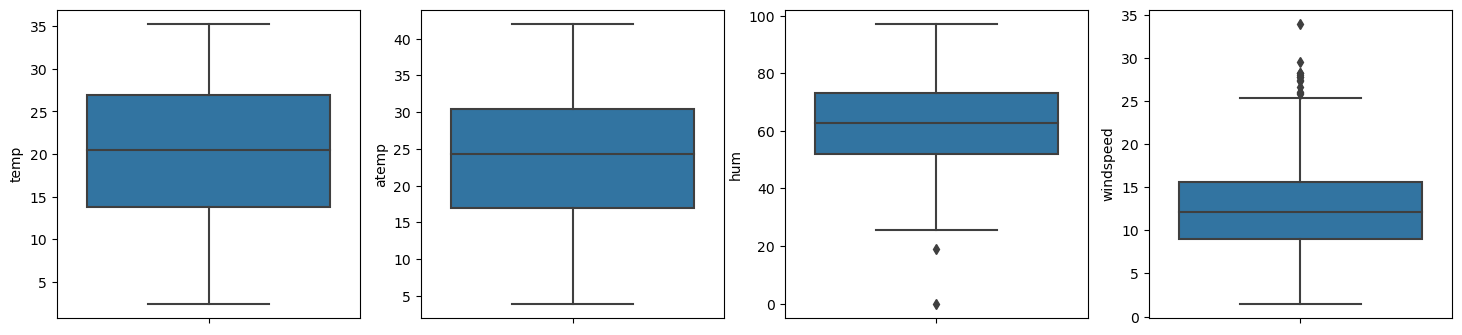

In [73]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

- No outliers found

###  Visualising the numerical data

<Figure size 1500x3000 with 0 Axes>

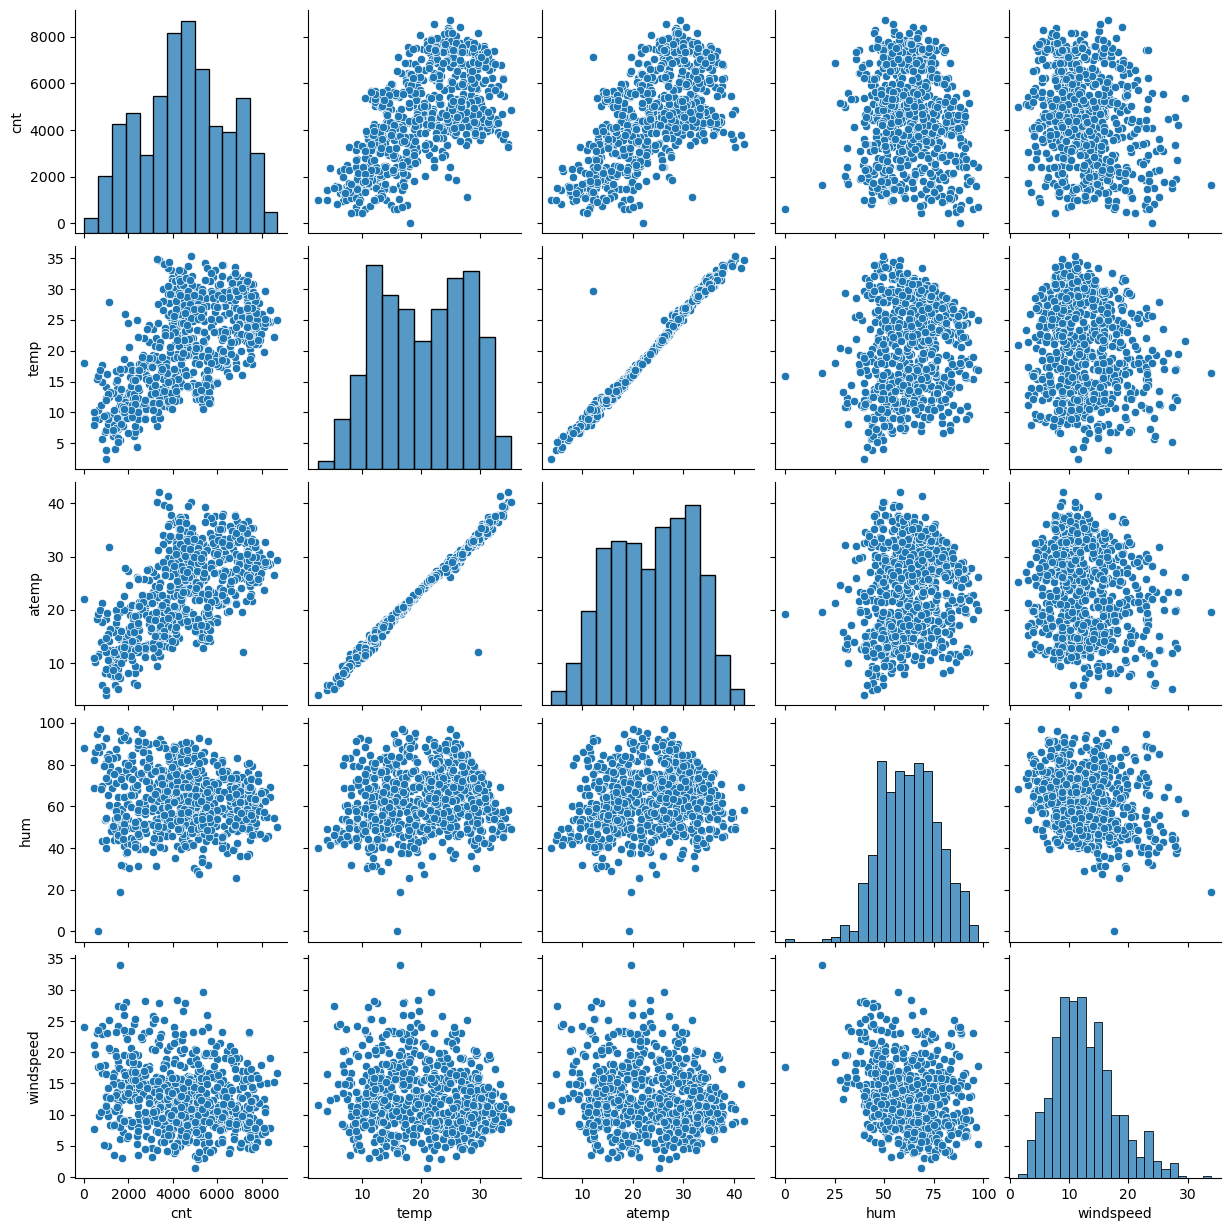

In [74]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()


- On analyzing above pair plot, it is evident that there is a linear relationshipt between temp and atemp. 
- Both temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other

### Visualizing categorical variable with target variable

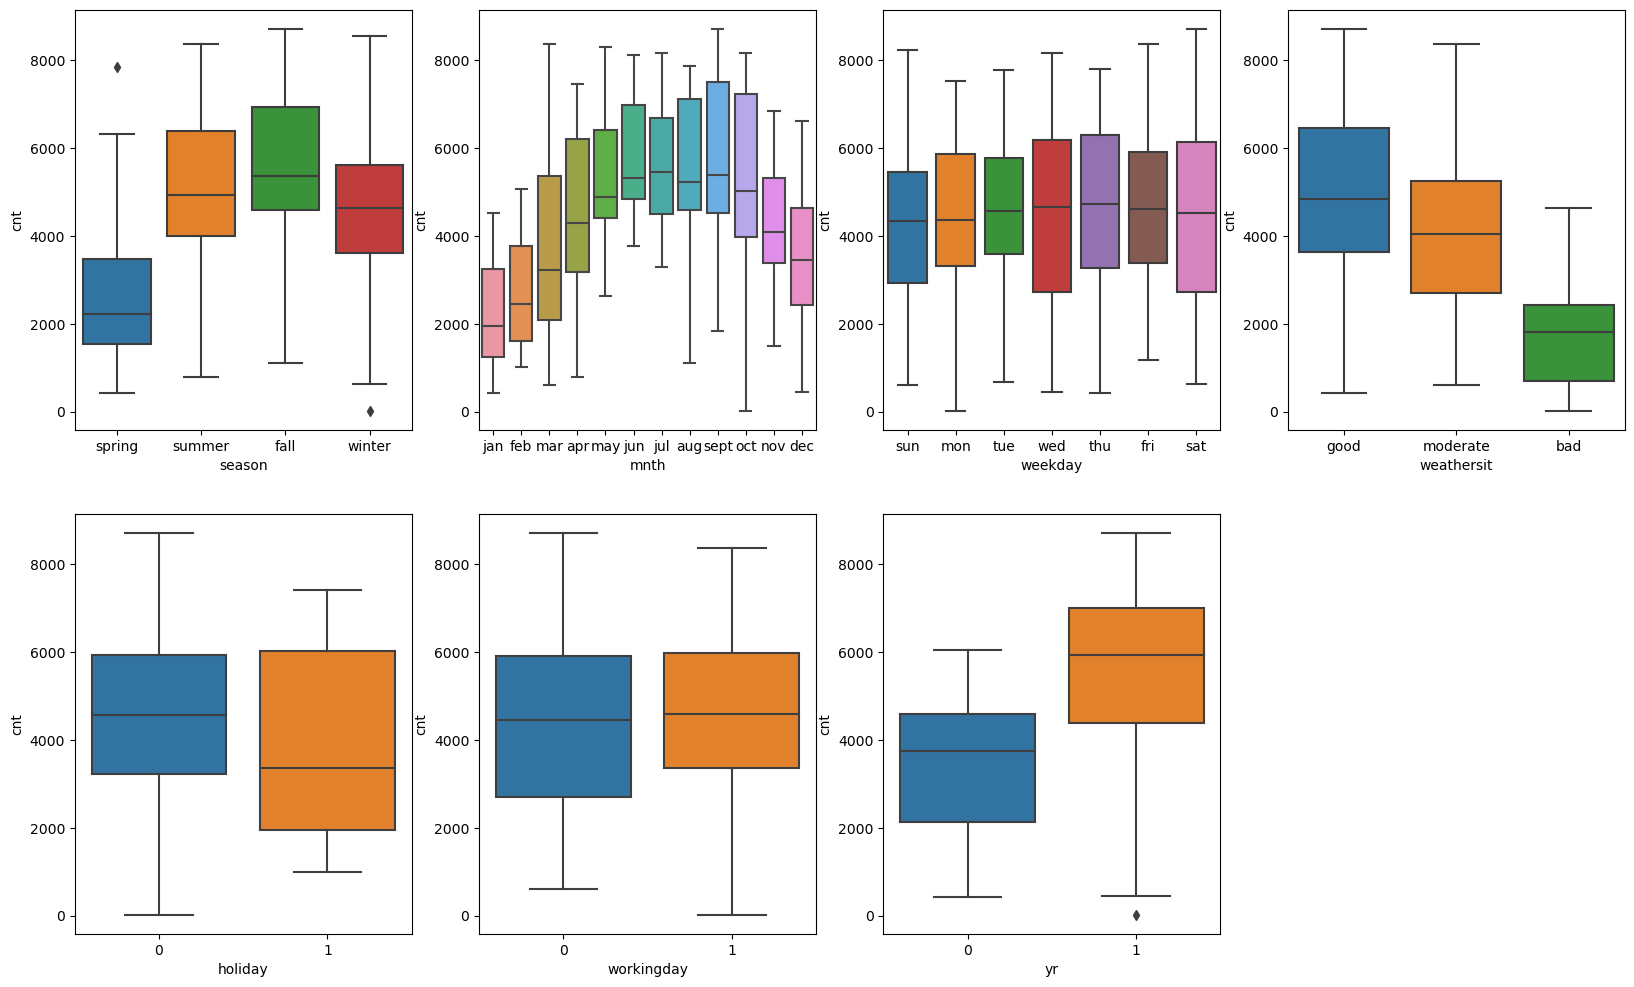

In [75]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.show()

- Season: 3:fall has highest demand for rental bikes
- Demand for next year has grown
- Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
- When there is a holiday, demand has decreased.
- Weekday is not giving clear picture abount demand.Weekday and weekends demand is almost same.
- The clear weathershit has highest demand
- During September and october, bike sharing is more. During the year end and beginning, it is less.This could be due to extreme weather condition

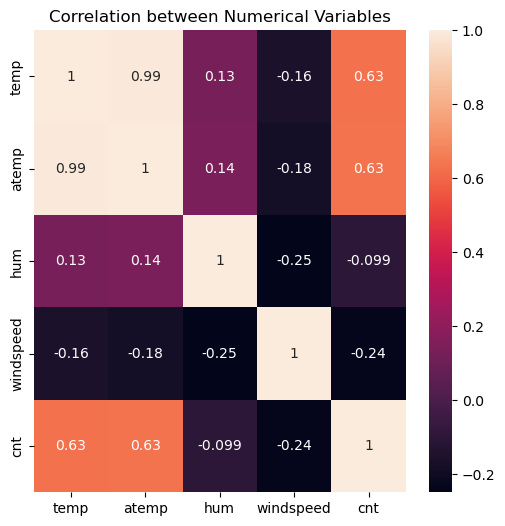

In [28]:
 
# Checking the correlation between the numerical variables

plt.figure(figsize = (6,6))
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.title("Correlation between Numerical Variables")
plt.show()

###  Creating dummy variable

In [29]:
'''
creating dummy variables for above columns
'''
df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"],drop_first=True)
print(df.columns)
df = df.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

df.head(30)

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_summer', 'season_fall', 'season_winter', 'mnth_feb',
       'mnth_mar', 'mnth_apr', 'mnth_may', 'mnth_jun', 'mnth_jul', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'mnth_nov', 'mnth_dec', 'weekday_mon',
       'weekday_tue', 'weekday_wed', 'weekday_thu', 'weekday_fri',
       'weekday_sat', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_summer,season_fall,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
0,0,0,0,14.110847,18.181250,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.686950,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.470250,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.606100,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.463500,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,1,8.378268,11.660450,51.8261,6.000868,1606,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,1,8.057402,10.441950,49.8696,11.304642,1510,0,0,...,0,0,0,0,0,0,1,0,1,0
7,0,0,0,6.765000,8.112700,53.5833,17.875868,959,0,0,...,0,0,0,0,0,0,0,1,1,0
8,0,0,0,5.671653,5.808750,43.4167,24.250650,822,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,6.184153,7.544400,48.2917,14.958889,1321,0,0,...,0,0,1,0,0,0,0,0,0,0


# Model building

### Model building involves five steps

- Create x (independent variable) and y (dependent variable)
- Split test and train data
- Scaling using minmax or normalize
- calculate vif
- build model

In [30]:
y=df.pop('cnt')
X=df

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=1000)

In [32]:
print("X train shape:", X_train.shape)
print("X test shape:", X_test.shape)


print("Y train shape:", y_train.shape)
print("Y test shape:", y_test.shape)


X train shape: (510, 29)
X test shape: (219, 29)
Y train shape: (510,)
Y test shape: (219,)


In [33]:
# Scaling using minmax 

num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [34]:
# verifying the head after appying scaling.

X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_summer,season_fall,season_winter,...,mnth_nov,mnth_dec,weekday_mon,weekday_tue,weekday_wed,weekday_thu,weekday_fri,weekday_sat,weathersit_moderate,weathersit_bad
544,1,0,1,0.964059,0.926848,0.503649,0.294854,0,1,0,...,0,0,0,0,0,0,1,0,0,0
674,1,0,1,0.240884,0.246245,0.584370,0.311545,0,0,1,...,1,0,0,1,0,0,0,0,0,0
477,1,0,1,0.294252,0.272602,0.790039,0.579511,1,0,0,...,0,0,1,0,0,0,0,0,1,0
176,0,0,0,0.762572,0.726076,0.528982,0.148724,0,1,0,...,0,0,0,0,0,0,0,0,0,0
655,1,0,1,0.556729,0.557620,0.750536,0.442296,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [35]:
#Recursive feature elimination

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [36]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_summer', True, 1),
 ('season_fall', True, 1),
 ('season_winter', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_mar', True, 1),
 ('mnth_apr', False, 2),
 ('mnth_may', True, 1),
 ('mnth_jun', False, 3),
 ('mnth_jul', False, 15),
 ('mnth_aug', True, 1),
 ('mnth_sept', True, 1),
 ('mnth_oct', True, 1),
 ('mnth_nov', False, 11),
 ('mnth_dec', False, 6),
 ('weekday_mon', False, 7),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 14),
 ('weekday_thu', False, 12),
 ('weekday_fri', False, 13),
 ('weekday_sat', False, 4),
 ('weathersit_moderate', True, 1),
 ('weathersit_bad', True, 1)]

In [37]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_summer',
       'season_fall', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_aug',
       'mnth_sept', 'mnth_oct', 'weathersit_moderate', 'weathersit_bad'],
      dtype='object')


In [38]:
# Generic function to build model
def buildModel(df):
    X_train_sm = sm.add_constant(df)
    lr = sm.OLS(y_train,X_train_sm).fit()
    print(lr.summary())

In [39]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [40]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]


X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_summer,season_fall,season_winter,mnth_mar,mnth_may,mnth_aug,mnth_sept,mnth_oct,weathersit_moderate,weathersit_bad
544,1,0,0.964059,0.503649,0.294854,0,1,0,0,0,0,0,0,0,0
674,1,0,0.240884,0.584370,0.311545,0,0,1,0,0,0,0,0,0,0
477,1,0,0.294252,0.790039,0.579511,1,0,0,0,0,0,0,0,1,0
176,0,0,0.762572,0.528982,0.148724,0,1,0,0,0,0,0,0,0,0
655,1,0,0.556729,0.750536,0.442296,0,0,1,0,0,0,0,1,1,0


## Step 5: Building a linear model

### Building a model can be done in two approaches

    - Either take one by one column and build model
    - Take all the columns and drop one by one which are insignificance
    
I am going with second approach    

### Model 1

In [41]:
# Building 1st linear regression model

lm1=buildModel(X_train_rfe)
calculateVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     168.2
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          5.08e-183
Time:                        22:01:39   Log-Likelihood:                -4115.3
No. Observations:                 510   AIC:                             8263.
Df Residuals:                     494   BIC:                             8330.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2265.6170    

,Features,VIF
2,temp,20.80
3,hum,15.17
6,season_fall,8.14
4,windspeed,4.35
5,season_summer,4.06
7,season_winter,3.12
13,weathersit_moderate,2.21
0,yr,1.95
12,mnth_oct,1.73
9,mnth_may,1.67


### Model 2

In [42]:
# As hum shows high VIF values  hence we can drop it
X_train_new = X_train_rfe.drop(['hum'], axis = 1)

buildModel(X_train_new)
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     170.5
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          4.88e-179
Time:                        22:01:39   Log-Likelihood:                -4127.5
No. Observations:                 510   AIC:                             8285.
Df Residuals:                     495   BIC:                             8349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1276.9965    

,Features,VIF
2,temp,15.53
5,season_fall,7.96
4,season_summer,4.05
3,windspeed,3.62
6,season_winter,2.84
0,yr,1.92
11,mnth_oct,1.70
8,mnth_may,1.66
9,mnth_aug,1.66
12,weathersit_moderate,1.52


### model 3

In [43]:
# We can drop mnth_aug variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_may'], axis = 1)
buildModel(X_train_new)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     182.5
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          1.77e-179
Time:                        22:01:39   Log-Likelihood:                -4129.2
No. Observations:                 510   AIC:                             8286.
Df Residuals:                     496   BIC:                             8346.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1268.9125    

,Features,VIF
2,temp,14.78
5,season_fall,7.69
4,season_summer,3.85
3,windspeed,3.57
6,season_winter,2.80
0,yr,1.92
10,mnth_oct,1.70
8,mnth_aug,1.66
11,weathersit_moderate,1.52
9,mnth_sept,1.38


### Model 4

In [44]:
# We can drop mnth_aug variable as it has high p-value
X_train_new = X_train_new.drop(['mnth_aug'], axis = 1)
buildModel(X_train_new)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     196.4
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          7.41e-180
Time:                        22:01:39   Log-Likelihood:                -4131.1
No. Observations:                 510   AIC:                             8288.
Df Residuals:                     497   BIC:                             8343.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1278.5934    

,Features,VIF
2,temp,14.78
5,season_fall,6.84
4,season_summer,3.85
3,windspeed,3.57
6,season_winter,2.79
0,yr,1.91
9,mnth_oct,1.70
10,weathersit_moderate,1.51
8,mnth_sept,1.24
7,mnth_mar,1.18


### Model 5

In [45]:
#dropping season_fall , because it has high vif value
X_train_new = X_train_new.drop(['season_fall'], axis = 1)
buildModel(X_train_new)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     206.9
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          9.25e-178
Time:                        22:01:39   Log-Likelihood:                -4138.8
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     498   BIC:                             8352.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1213.5630    

,Features,VIF
2,temp,3.64
3,windspeed,3.46
5,season_winter,1.93
0,yr,1.90
8,mnth_oct,1.66
4,season_summer,1.62
9,weathersit_moderate,1.51
7,mnth_sept,1.19
6,mnth_mar,1.13
10,weathersit_bad,1.07


- Model 5 is good for consideration
- VIF values are less than 5 it is good
- p-value for all the columns is 0.0
- Important statistics like R-square, Adjusted R-squared and F-statistic are high
- Difference between R-squared and Adjusted R-squared values for this model is very less, 
  which also means that there are no additional parameters that can be removed from this model.



In [46]:
X_train_sm = sm.add_constant(X_train_new)
lr = sm.OLS(y_train,X_train_sm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     206.9
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          9.25e-178
Time:                        22:01:39   Log-Likelihood:                -4138.8
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     498   BIC:                             8352.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1213.5630    

### Residual Analysis

In [47]:
y_train_pred = lr.predict(X_train_sm)
y_train_pred

544    7359.100968
674    5137.735700
477    3995.835962
176    4579.999924
655    6067.345152
          ...     
350    2143.410361
251    4482.292236
704    4984.180026
71     2647.226025
599    6697.988401
Length: 510, dtype: float64

# Assumption of linear regression model

- In linear regression, several key assumptions underpin the validity and reliability of the model. 
- Ensuring these assumptions are met helps ensure that the model's estimates are accurate and that statistical inferences drawn from the model are valid. 
- Here's a detailed explanation of each assumption:

### Normality of error terms

- Error terms should be normally distributed

Text(0.5, 0, 'Errors')

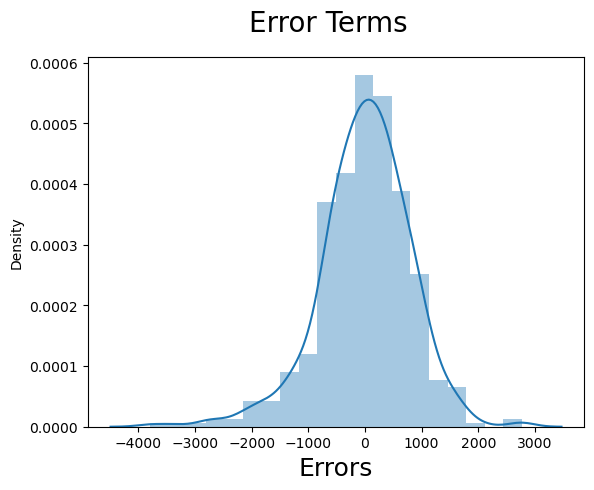

In [48]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

From the plot, it is evident that error terms are following normal distribution

### Multi Colinearity

- High correlation among independent variables can make it difficult to determine the individual effect of each predictor on the dependent variable. This can lead to unreliable estimates and inflated standard errors.

#### Diagnostic:

##### Variance Inflation Factor (VIF): 
- Measures how much the variance of an estimated regression coefficient increases due to multicollinearity.
##### Correlation Matrix: 
- High correlations between predictors can indicate potential multicollinearity.

In [49]:
#VIF are less then 5 so it is good 
calculateVIF(X_train_new)

,Features,VIF
2,temp,3.64
3,windspeed,3.46
5,season_winter,1.93
0,yr,1.90
8,mnth_oct,1.66
4,season_summer,1.62
9,weathersit_moderate,1.51
7,mnth_sept,1.19
6,mnth_mar,1.13
10,weathersit_bad,1.07


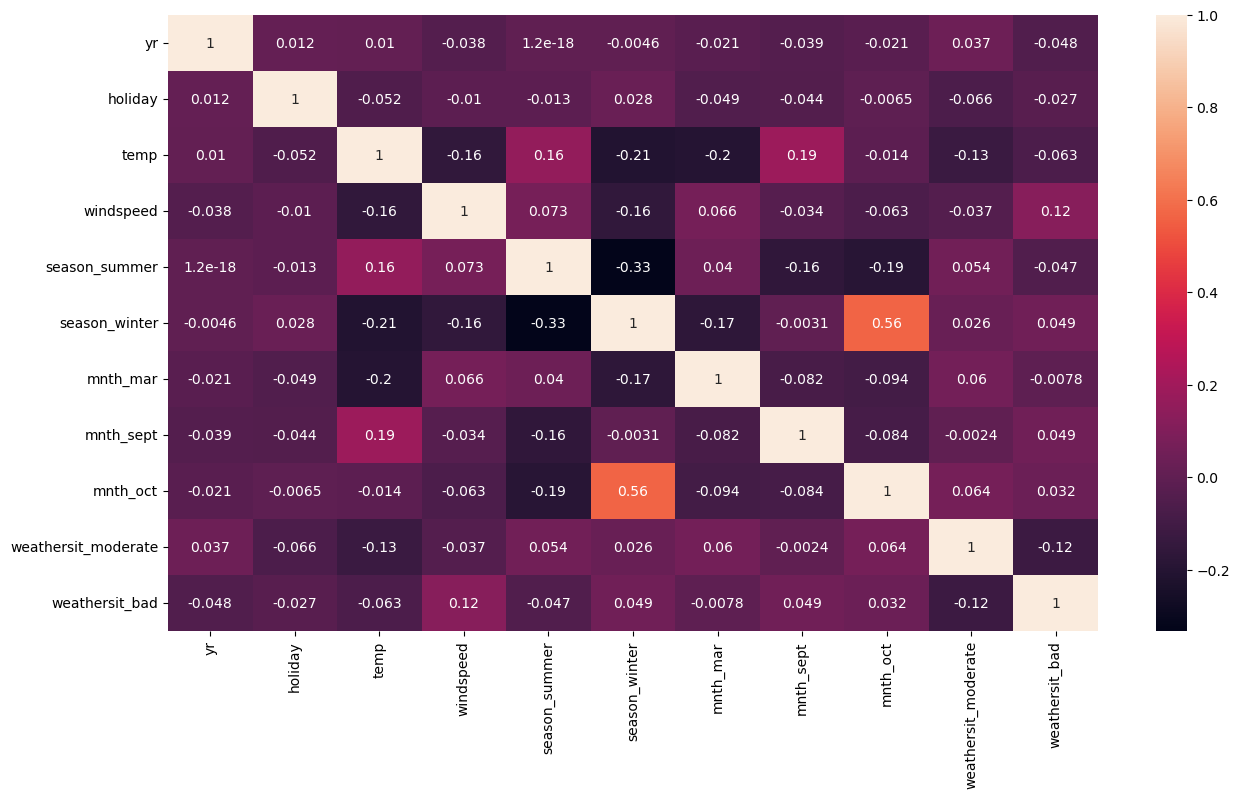

In [50]:
# from the heat map it is evident that there is  no multicolinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True)
plt.show()

### Linearity

-  The relationship between the dependent variable (𝑦) and each of the independent variables (x) is linear.

In [51]:
#Print R squared value
r2_score(y_train,y_train_pred)

0.8204937942983769

### Making prediction 

In [76]:
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

KeyError: "['atemp', 'hum'] not in index"

In [ ]:
X_test = X_test[X_train_new.columns]

# Adding constant variable to test dataframe
X_test_lm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_lm)

In [ ]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

### Model Evaluation

In [ ]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [ ]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

In [ ]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [ ]:
X_train_new.columns

### Ouput

### Significant variables to predict the demand for shared bikes

- holiday
- temp
- windspeed
- season_summer
- season_winter
- mnth_mar
- mnth_sept
- weathersit( Light Snow, Mist + Cloudy)


### Train data output

- Train dataset R^2          : 0.8204
- Train dataset Adjusted R^2 : 0.81   


### Test data output

- Test dataset R^2           : 0.8264
- Test dataset Adjusted R^2  : 0.8172